In [ ]:
!pip install tabulate

In [ ]:
# Parameters example STEP 1
import numpy as np
import pandas as pd
from tabulate import tabulate

# Parameters
S = 100      # Spot price
K = 100      # Strike price
T = 1        # Time to maturity (in years)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
steps = 5    # Number of binomial steps

# Derived parameters
dt = T / steps
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Initialize tree structure
def init_tree(steps):
    return [[0 for _ in range(i + 1)] for i in range(steps + 1)]

# Generate stock price tree
def generate_stock_tree(S, u, d, steps):
    tree = init_tree(steps)
    for i in range(steps + 1):
        for j in range(i + 1):
            tree[i][j] = S * (u ** j) * (d ** (i - j))
    return tree

# Price European option using backward induction
def price_option_european(tree, K, r, dt, is_call=True):
    option_tree = init_tree(steps)
    for j in range(steps + 1):
        option_tree[steps][j] = max(0, tree[steps][j] - K) if is_call else max(0, K - tree[steps][j])
    for i in reversed(range(steps)):
        for j in range(i + 1):
            option_tree[i][j] = discount * (p * option_tree[i + 1][j + 1] + (1 - p) * option_tree[i + 1][j])
    return option_tree[0][0]

# Price American option with early exercise
def price_option_american(tree, K, r, dt, is_call=True):
    option_tree = init_tree(steps)
    for j in range(steps + 1):
        option_tree[steps][j] = max(0, tree[steps][j] - K) if is_call else max(0, K - tree[steps][j])
    for i in reversed(range(steps)):
        for j in range(i + 1):
            continuation = discount * (p * option_tree[i + 1][j + 1] + (1 - p) * option_tree[i + 1][j])
            exercise = max(0, tree[i][j] - K) if is_call else max(0, K - tree[i][j])
            option_tree[i][j] = max(continuation, exercise)
    return option_tree[0][0]

# Generate stock tree
stock_tree = generate_stock_tree(S, u, d, steps)

# Compute option prices
european_call = price_option_european(stock_tree, K, r, dt, is_call=True)
european_put = price_option_european(stock_tree, K, r, dt, is_call=False)
american_call = price_option_american(stock_tree, K, r, dt, is_call=True)
american_put = price_option_american(stock_tree, K, r, dt, is_call=False)

# Verify put-call parity (only for European options)
put_call_parity = european_call - european_put
theoretical_parity = S - K * np.exp(-r * T)

# Create results table
results = pd.DataFrame({
    'Option Type': ['European Call', 'European Put', 'American Call', 'American Put', 'Put-Call Parity'],
    'Price': [european_call, european_put, american_call, american_put, put_call_parity],
    'Check (vs S - PV(K))': ['', '', '', '', np.round(theoretical_parity,2)]
})

# Display results
headers = ['Option Type', 'Price', 'Check (vs S - PV(K))']
print(tabulate(results.round(2), headers=headers, tablefmt="pretty", floatfmt=".4f"))

+---+-----------------+-------+----------------------+
|   |   Option Type   | Price | Check (vs S - PV(K)) |
+---+-----------------+-------+----------------------+
| 0 |  European Call  | 10.81 |                      |
| 1 |  European Put   | 5.93  |                      |
| 2 |  American Call  | 10.81 |                      |
| 3 |  American Put   | 6.37  |                      |
| 4 | Put-Call Parity | 4.88  |         4.88         |
+---+-----------------+-------+----------------------+


Step 1:

Team member A will work with European Calls and Puts using a Binomial Tree.
For the next set of questions, assume the following values and parameters:


European option pricing with binomial tree: 

+---+------------------+-------+
|   |      Metric      | Value |
+---+------------------+-------+
| 0 | Call Price (20%) | 4.61  |
| 1 | Put Price (20%)  | 3.36  |
| 2 |    Call Delta    | 0.57  |
| 3 |    Put Delta     | -0.43 |
| 4 | Call Price (25%) | 5.59  |
| 5 | Put Price (25%)  | 4.34  |
| 6 |    Call Vega     | 19.62 |
| 7 |     Put Vega     | 19.62 |
+---+------------------+-------+


Text(0.5, 1.0, 'Graph 1: European option prices vs stock prices')

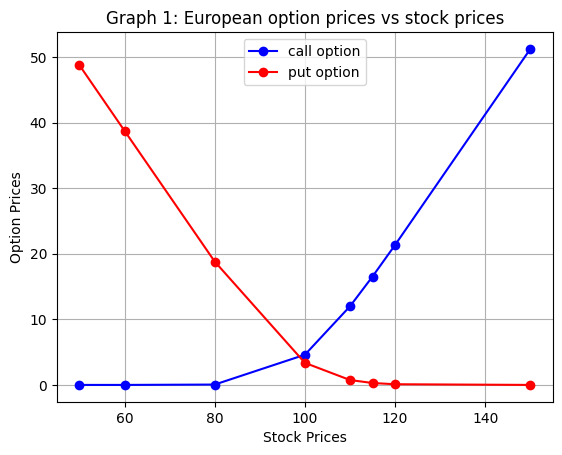

In [ ]:
import numpy as np
import pandas as pd

# Parameters
S0 = 100               # Spot price
K = 100                # Strike price (ATM)
r = 0.05               # Risk-free interest rate
sigma_20 = 0.20        # Initial volatility
sigma_25 = 0.25        # Volatility after 5% increase
T = 0.25               # Time to maturity (3 months)
steps = 100            # Number of steps in the binomial tree

# Binomial model functions
def binomial_factors(sigma, dt):
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    return u, d, p

def init_tree(steps):
    return [[0 for _ in range(i + 1)] for i in range(steps + 1)]

def generate_stock_tree(S, u, d, steps):
    tree = init_tree(steps)
    for i in range(steps + 1):
        for j in range(i + 1):
            tree[i][j] = S * (u ** j) * (d ** (i - j))
    return tree

def price_european_option(S, K, r, sigma, T, steps, is_call=True):
    dt = T / steps
    discount = np.exp(-r * dt)
    u, d, p = binomial_factors(sigma, dt)
    tree = generate_stock_tree(S, u, d, steps)
    option_tree = init_tree(steps)

    for j in range(steps + 1):
        option_tree[steps][j] = max(0, tree[steps][j] - K) if is_call else max(0, K - tree[steps][j])
    for i in reversed(range(steps)):
        for j in range(i + 1):
            option_tree[i][j] = discount * (p * option_tree[i + 1][j + 1] + (1 - p) * option_tree[i + 1][j])
    return option_tree[0][0]

# Compute base option prices at 20% volatility
call_20 = price_european_option(S0, K, r, sigma_20, T, steps, is_call=True)
put_20 = price_european_option(S0, K, r, sigma_20, T, steps, is_call=False)

# Compute Delta using central difference method
epsilon = 0.01
call_up = price_european_option(S0 + epsilon, K, r, sigma_20, T, steps, is_call=True)
call_down = price_european_option(S0 - epsilon, K, r, sigma_20, T, steps, is_call=True)
call_delta = (call_up - call_down) / (2 * epsilon)

put_up = price_european_option(S0 + epsilon, K, r, sigma_20, T, steps, is_call=False)
put_down = price_european_option(S0 - epsilon, K, r, sigma_20, T, steps, is_call=False)
put_delta = (put_up - put_down) / (2 * epsilon)

# Compute Vega as sensitivity to volatility increase from 20% to 25%
call_25 = price_european_option(S0, K, r, sigma_25, T, steps, is_call=True)
put_25 = price_european_option(S0, K, r, sigma_25, T, steps, is_call=False)
call_vega = (call_25 - call_20) / (sigma_25 - sigma_20)
put_vega = (put_25 - put_20) / (sigma_25 - sigma_20)

# Compile results
results = pd.DataFrame({
    "Metric": ["Call Price (20%)", "Put Price (20%)", "Call Delta", "Put Delta",
               "Call Price (25%)", "Put Price (25%)", "Call Vega", "Put Vega"],
    "Value": [call_20, put_20, call_delta, put_delta, call_25, put_25, call_vega, put_vega]
})


# Print results
print("European option pricing with binomial tree: \n")
headers = ["Metric", "Value"]
print(tabulate(results.round(2), headers=headers, tablefmt="pretty", floatfmt=".4f"))

# European call and put vs stock prices
stock_prices = S0*np.array([0.5, 0.6, 0.8, 1, 1.10, 1.15, 1.20, 1.50])
call_prices = np.array([price_european_option(S, S0, r, sigma_20, T, steps, is_call=True) for S in stock_prices])
put_prices = np.array([price_european_option(S, S0, r, sigma_20, T, steps, is_call=False) for S in stock_prices])

plt.plot(stock_prices, call_prices, 'bo-', label = 'call option')
plt.plot(stock_prices, put_prices, 'ro-', label = 'put option')
plt.xlabel("Stock Prices")
plt.ylabel("Option Prices")
plt.legend()
plt.grid()
plt.title("Graph 1: European option prices vs stock prices")

Team member B will work with American Calls and Puts using a Binomial Tree.
For the next set of questions, assume the same values and parameters as before.


American option pricing with binomial tree: 

+---+------------------+-------+
|   |      Metric      | Value |
+---+------------------+-------+
| 0 | Call Price (20%) |  4.6  |
| 1 | Put Price (20%)  | 3.47  |
| 2 |    Call Delta    | 0.57  |
| 3 |    Put Delta     | -0.45 |
| 4 | Call Price (25%) | 5.58  |
| 5 | Put Price (25%)  | 4.45  |
| 6 |    Call Vega     | 19.59 |
| 7 |     Put Vega     | 19.54 |
+---+------------------+-------+


Text(0.5, 1.0, 'Graph 2: American option prices vs stock prices')

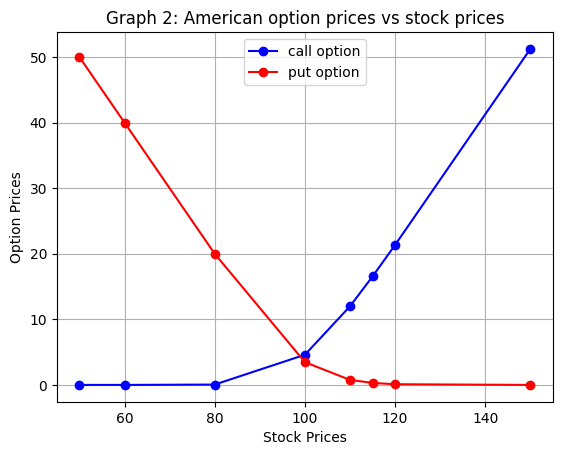

In [ ]:
# Parameters
S0 = 100               # Spot price
K = 100                # Strike price (ATM)
r = 0.05               # Risk-free interest rate
sigma_20 = 0.20        # Initial volatility
sigma_25 = 0.25        # Volatility after 5% increase
T = 0.25               # Time to maturity (3 months)
steps = int(T*250)           # Number of steps in the binomial tree

# Binomial model functions
def binomial_factors(sigma, dt):
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    return u, d, p

def init_tree(steps):
    return [[0 for _ in range(i + 1)] for i in range(steps + 1)]

def generate_stock_tree(S, u, d, steps):
    tree = init_tree(steps)
    for i in range(steps + 1):
        for j in range(i + 1):
            tree[i][j] = S * (u ** j) * (d ** (i - j))
    return tree

# Price American option with early exercise
def price_american_option(S, K, r, sigma, T, steps, is_call=True):
    dt = T / steps
    discount = np.exp(-r * dt)
    u, d, p = binomial_factors(sigma, dt)
    tree = generate_stock_tree(S, u, d, steps)
    option_tree = init_tree(steps)
    delta = np.zeros([steps, steps])

    for j in range(steps + 1):
        option_tree[steps][j] = max(0, tree[steps][j] - K) if is_call else max(0, K - tree[steps][j])
    for i in reversed(range(steps)):
        for j in range(i + 1):
            continuation = discount * (p * option_tree[i + 1][j + 1] + (1 - p) * option_tree[i + 1][j])
            exercise = max(0, tree[i][j] - K) if is_call else max(0, K - tree[i][j])
            option_tree[i][j] = max(continuation, exercise)
            delta[i][j] = (option_tree[i + 1][j+1] - option_tree[i + 1][j]) / (
                tree[i + 1][j+1] - tree[i + 1][j]
            )
    return option_tree[0][0], delta[0][0]

# Compute base option prices and deltas at 20% volatility
call_20, call_delta_20 = price_american_option(S0, K, r, sigma_20, T, steps, is_call=True)
put_20, put_delta_20 = price_american_option(S0, K, r, sigma_20, T, steps, is_call=False)


# Compute Vega as sensitivity to volatility increase from 20% to 25%
call_25, _ = price_american_option(S0, K, r, sigma_25, T, steps, is_call=True)
put_25, _ = price_american_option(S0, K, r, sigma_25, T, steps, is_call=False)
call_vega = (call_25 - call_20) / (sigma_25 - sigma_20)
put_vega = (put_25 - put_20) / (sigma_25 - sigma_20)

# Compile results
results = pd.DataFrame({
    "Metric": ["Call Price (20%)", "Put Price (20%)", "Call Delta", "Put Delta",
               "Call Price (25%)", "Put Price (25%)", "Call Vega", "Put Vega"],
    "Value": [call_20, put_20, call_delta_20, put_delta_20, call_25, put_25, call_vega, put_vega]
})

# Print results
print("American option pricing with binomial tree: \n")
headers = ["Metric", "Value"]
print(tabulate(results.round(2), headers=headers, tablefmt="pretty", floatfmt=".4f"))


# American call and put vs stock prices
stock_prices = S0*np.array([0.5, 0.6, 0.8, 1, 1.10, 1.15, 1.20, 1.50])
call_prices = np.array([price_american_option(S, S0, r, sigma_20, T, steps, is_call=True)[0] for S in stock_prices])
put_prices = np.array([price_american_option(S, S0, r, sigma_20, T, steps, is_call=False)[0] for S in stock_prices])

plt.plot(stock_prices, call_prices, 'bo-', label = 'call option')
plt.plot(stock_prices, put_prices, 'ro-', label = 'put option')
plt.xlabel("Stock Prices")
plt.ylabel("Option Prices")
plt.legend()
plt.grid()
plt.title("Graph 2: American option prices vs stock prices")

Text(0.5, 1.0, 'American options price with binomial tree')

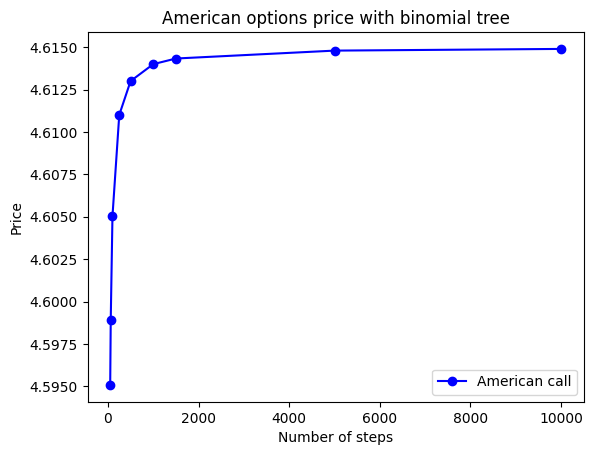

In [ ]:
# Choice of the number of steps
nb_steps = np.array([50, 62, 100, 250, 500, 1000, 1500, 5000, 10000])
call_prices = np.array([price_american_option(S0, K, r, sigma_20, T, steps, is_call=True)[0] for steps in nb_steps])

plt.plot(nb_steps, call_prices, 'bo-', label = 'American call')
plt.xlabel("Number of steps")
plt.ylabel("Price")
plt.legend()
plt.title("American options price with binomial tree")

Text(0.5, 1.0, 'Graph 3: European and American call prices vs strikes')

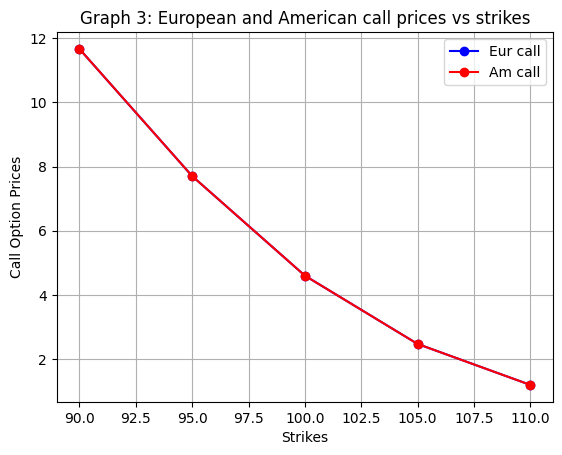

In [ ]:
# European and American calls vs strike
strikes = S0*np.array([0.90, 0.95, 1, 1.05, 1.10])
eur_call_prices = np.array([price_european_option(S0, K, r, sigma_20, T, steps, is_call=True) for K in strikes])
am_call_prices = np.array([price_american_option(S0, K, r, sigma_20, T, steps, is_call=True)[0] for K in strikes])

plt.plot(strikes, eur_call_prices, 'bo-', label = 'Eur call')
plt.plot(strikes, am_call_prices, 'ro-', label = 'Am call')
plt.xlabel("Strikes")
plt.ylabel("Call Option Prices")
plt.legend()
plt.grid()
plt.title("Graph 3: European and American call prices vs strikes")

Text(0.5, 1.0, 'Graph 4: European and American put prices vs strikes')

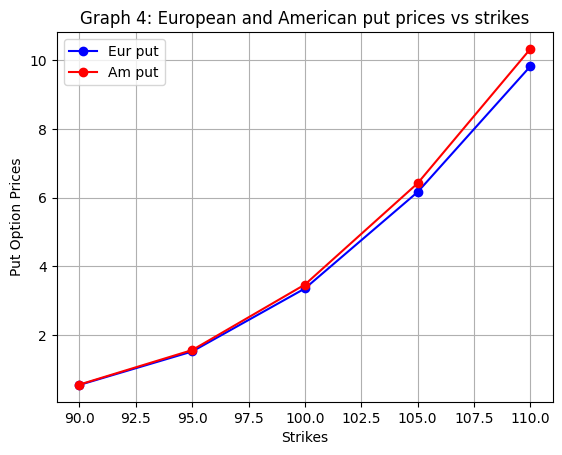

In [ ]:
# European and American puts vs strike
strikes = S0*np.array([0.90, 0.95, 1, 1.05, 1.10])
eur_call_prices = np.array([price_european_option(S0, K, r, sigma_20, T, steps, is_call=False) for K in strikes])
am_call_prices = np.array([price_american_option(S0, K, r, sigma_20, T, steps, is_call=False)[0] for K in strikes])

plt.plot(strikes, eur_call_prices, 'bo-', label = 'Eur put')
plt.plot(strikes, am_call_prices, 'ro-', label = 'Am put')
plt.xlabel("Strikes")
plt.ylabel("Put Option Prices")
plt.legend()
plt.grid()
plt.title("Graph 4: European and American put prices vs strikes")

STEP 2:

European option pricing with trinomial tree: 

+---------+-------+------+------------------+---------+
| Strikes | Call  | Put  | Call + K*e^(-rT) | put + S |
+---------+-------+------+------------------+---------+
|  90.0   | 11.67 | 0.55 |      100.55      | 100.55  |
|  95.0   | 7.71  | 1.53 |      101.53      | 101.53  |
|  100.0  | 4.61  | 3.36 |      103.36      | 103.36  |
|  105.0  | 2.48  | 6.18 |      106.18      | 106.18  |
|  110.0  | 1.19  | 9.83 |      109.83      | 109.83  |
+---------+-------+------+------------------+---------+


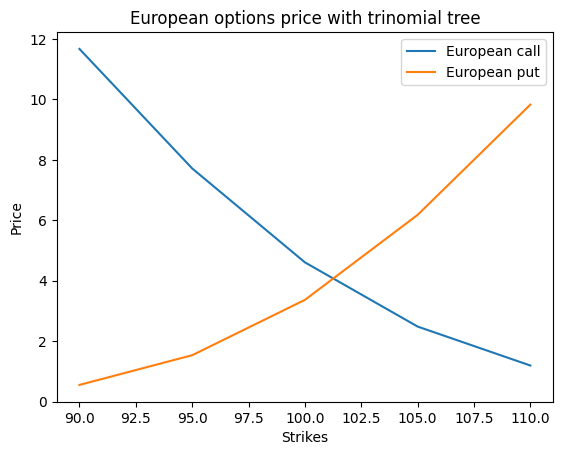

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Parameters
S0 = 100               # Spot price
r = 0.05               # Risk-free interest rate
sigma_20 = 0.20        # Initial volatility
sigma_25 = 0.25        # Volatility after 5% increase
T = 0.25               # Time to maturity (3 months)
steps = int(T*250)            # Number of steps in the binomial tree


# Trinomial model functions
def _gen_stock_vec(S, sigma, u, d, nb):
    vec_u = u * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)
    vec_d = d * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)
    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= S
    return res

def trinomial_factors(sigma, dt):
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u  # down movement to force a "recombining tree"

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * dt / 2) + np.exp(sigma * np.sqrt(dt / 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
    pm = 1 - pu - pd
    return u, d, pu, pd, pm

def price_european_option(S, K, r, sigma, T, steps, is_call=True):
    dt = T / steps
    discount = np.exp(-r * dt)
    u, d, pu, pd, pm = trinomial_factors(sigma, dt)
    s = _gen_stock_vec(S, sigma, u, d, steps)

    final_payoff = np.maximum(s - K, 0) if is_call else np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    for i in range(1, steps + 1):
        vec_stock = _gen_stock_vec(S, sigma, u, d, steps-i)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation
    return nxt_vec_prices[0]


# Compute option price for different strikes
strikes = S0*np.array([0.90, 0.95, 1, 1.05, 1.10])

# Call prices
price_call_eur = np.array([price_european_option(S0, K, r, sigma_20, T, steps, is_call=True) for K in strikes])

# Put price
price_put_eur = np.array([price_european_option(S0, K, r, sigma_20, T, steps, is_call=False) for K in strikes])

plt.plot(strikes, price_call_eur, label = 'European call')
plt.plot(strikes, price_put_eur, label = 'European put')
plt.xlabel("Strikes")
plt.ylabel("Price")
plt.legend()
plt.title("European options price with trinomial tree")

# Call-put parity
call_pur_parity_eur = np.array([strikes,
                                price_call_eur,
                                price_put_eur,
                                price_call_eur + strikes*np.exp(-r*T),
                                price_put_eur + S0])
call_pur_parity_eur = call_pur_parity_eur.T.round(2)

# Print results
print("European option pricing with trinomial tree: \n")
headers = ["Strikes", "Call", "Put", "Call + K*e^(-rT)", "put + S"]
print(tabulate(call_pur_parity_eur, headers=headers, tablefmt="pretty", floatfmt=".4f"))



American option pricing with trinomial tree: 

+---------+-------+-------+------------------+---------+
| Strikes | Call  |  Put  | Call + K*e^(-rT) | put + S |
+---------+-------+-------+------------------+---------+
|  90.0   | 11.67 | 0.56  |      100.55      | 100.56  |
|  95.0   | 7.71  | 1.57  |      101.53      | 101.57  |
|  100.0  | 4.61  | 3.47  |      103.36      | 103.47  |
|  105.0  | 2.48  | 6.42  |      106.18      | 106.42  |
|  110.0  | 1.19  | 10.33 |      109.83      | 110.33  |
+---------+-------+-------+------------------+---------+


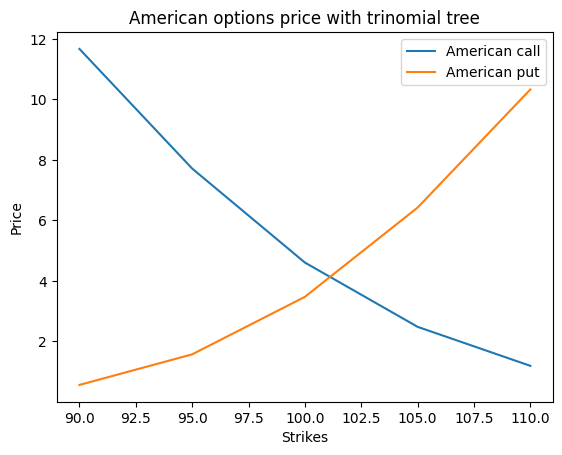

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Parameters
S0 = 100               # Spot price
r = 0.05               # Risk-free interest rate
sigma_20 = 0.20        # Initial volatility
sigma_25 = 0.25        # Volatility after 5% increase
T = 0.25               # Time to maturity (3 months)
steps = int(T*250)            # Number of steps in the binomial tree


# Trinomial model functions
def _gen_stock_vec(S, sigma, u, d, nb):
    vec_u = u * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)
    vec_d = d * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)
    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= S
    return res

def trinomial_factors(sigma, dt):
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u  # down movement to force a "recombining tree"

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * dt / 2) + np.exp(sigma * np.sqrt(dt / 2)))
        / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))
    ) ** 2
    pm = 1 - pu - pd
    return u, d, pu, pd, pm

def price_american_option(S, K, r, sigma, T, steps, is_call=True):
    dt = T / steps
    discount = np.exp(-r * dt)
    u, d, pu, pd, pm = trinomial_factors(sigma, dt)
    s = _gen_stock_vec(S, sigma, u, d, steps)

    final_payoff = np.maximum(s - K, 0) if is_call else np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    for i in range(1, steps + 1):
        vec_stock = _gen_stock_vec(S, sigma, u, d, steps-i)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        actual_payoff = np.maximum(vec_stock - K, 0) if is_call else np.maximum(K - vec_stock, 0)
        nxt_vec_prices = np.maximum(discount * expectation, actual_payoff)
    return nxt_vec_prices[0]


# Compute option price for different strikes
strikes = S0*np.array([0.90, 0.95, 1, 1.05, 1.10])

# Call prices
price_call_am = np.array([price_american_option(S0, K, r, sigma_20, T, steps, is_call=True) for K in strikes])

# Put price
price_put_am = np.array([price_american_option(S0, K, r, sigma_20, T, steps, is_call=False) for K in strikes])

plt.plot(strikes, price_call_am, label = 'American call')
plt.plot(strikes, price_put_am, label = 'American put')
plt.xlabel("Strikes")
plt.ylabel("Price")
plt.legend()
plt.title("American options price with trinomial tree")

# Call-put parity
call_pur_parity_am = np.array([strikes,
                               price_call_am,
                               price_put_am,
                               price_call_am + strikes*np.exp(-r*T),
                               price_put_am + S0])
call_pur_parity_am = call_pur_parity_am.T.round(2)

# Print results
print("American option pricing with trinomial tree: \n")
headers = ["Strikes", "Call", "Put", "Call + K*e^(-rT)", "put + S"]
print(tabulate(call_pur_parity_am, headers=headers, tablefmt="pretty", floatfmt=".4f"))



**Question 26: ** Using the same data from Q25, price an American Put option. Still, assume you are acting as the seller of this put. Consider now 25 steps in the tree (do this via python code).

In [ ]:
import numpy as np
import pandas as pd

# Parameters
S0 = 180          # Initial stock price
K = 182           # Strike price
r = 0.02          # Risk-free rate
sigma = 0.25      # Volatility
T = 0.5           # Time to maturity (6 months)
steps = 25        # Number of steps in the binomial tree

# Binomial tree parameters
dt = T / steps
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Stock price tree
stock_tree = np.zeros((steps + 1, steps + 1))
stock_tree[0, 0] = S0
for i in range(1, steps + 1):
    for j in range(i + 1):
        stock_tree[i, j] = S0 * (u ** (i - j)) * (d ** j)

# Option value tree (American put)
option_tree = np.zeros((steps + 1, steps + 1))
# Terminal payoffs
for j in range(steps + 1):
    option_tree[steps, j] = max(K - stock_tree[steps, j], 0)

# Backward induction with early exercise
for i in range(steps - 1, -1, -1):
    for j in range(i + 1):
        continuation = discount * (p * option_tree[i + 1, j] + (1 - p) * option_tree[i + 1, j + 1])
        intrinsic = max(K - stock_tree[i, j], 0)
        option_tree[i, j] = max(continuation, intrinsic)

# Delta tree
delta_tree = np.zeros((steps, steps))
for i in range(steps):
    for j in range(i + 1):
        delta_tree[i, j] = (option_tree[i + 1, j] - option_tree[i + 1, j + 1]) / (stock_tree[i + 1, j] - stock_tree[i + 1, j + 1])

# Print initial put price
print(f"American Put Price: {option_tree[0, 0]:.2f}")

# For reference, store trees for later use
stock_tree_df = pd.DataFrame(stock_tree)
option_tree_df = pd.DataFrame(option_tree)
delta_tree_df = pd.DataFrame(delta_tree)

American Put Price: 13.04


Question 27. Asian ATM Put Option - 25 step:
Using the same data from Q25, price an American Put option. Still, assume you
are acting as the seller of this put. Consider now 25 steps in the tree (do this via
python code).


In [ ]:
import math

# Parameters
S0 = 180
r = 0.02
sigma = 0.25
T = 0.5
K = 182
N = 25

# Binomial tree parameters
delta_t = T / N
u = math.exp(sigma * math.sqrt(delta_t))
d = 1 / u
p = (math.exp(r * delta_t) - d) / (u - d)
q = 1 - p
discount = math.exp(-r * T)

# Calculate option price by enumerating all paths
total = 0
for i in range(2**N):
    # Convert integer to binary string, representing path (0 = down, 1 = up)
    path = bin(i)[2:].zfill(N)
    S = S0
    sum_S = S0  # Include S0 in the average
    prob = 1
    # Follow the path to compute stock prices and probability
    for move in path:
        if move == '0':  # Down move
            S *= d
            prob *= q
        else:  # Up move
            S *= u
            prob *= p
        sum_S += S
    # Compute average and payoff
    A = sum_S / (N + 1)  # N+1 points including S0
    payoff = max(K - A, 0)
    total += payoff * prob

# Option price
option_price = discount * total
print(f"Asian Put Option Price with {N} steps: {option_price:.3f}")

Asian Put Option Price with 25 steps: 7.851
